# Convergence Tests

In [1]:
using Plots, Measures, Printf
theme(:wong2)
#using Interpolations
using Dierckx
using LaTeXStrings
include("../Utils/misc-tsv.jl")

Main.MiscTSV

## Errors

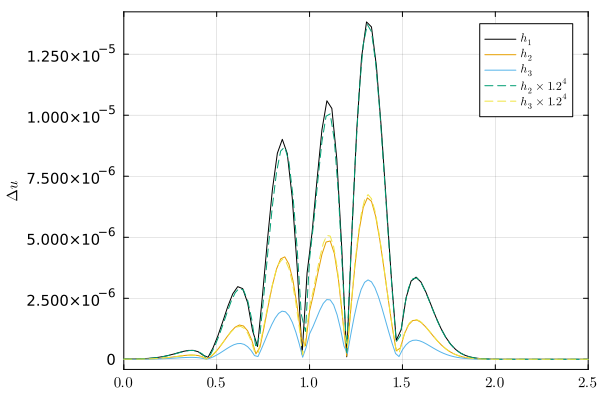

In [2]:
plts = []
conv_bases = [1, 1.2, 1.2, 1.2]
let l=0, t=1.0, dirss,
    dirss = [
        [
            #("gaussian_250_r0000/gaussian_250/", "250"),
            ("gaussian_300_r0000/gaussian_300/", "300"),
            ("gaussian_360_r0000/gaussian_360/", "360"),
            ("gaussian_432_r0000/gaussian_432/", "432"),
        ],
    ]

    for (j, dirs) in enumerate(dirss)
        (dats, _) = MiscTSV.load_data_1d(dirs, t; parent_dir="../../data/ScalarWave/2levels",
                                                  prefix="testsubcyclingmc2-error",
                                                  level=l, ngh=0)
        
        plt = plot(titlefontsize=10, guidefontsize=10, tickfontsize=10, legendfontsize=8)
        xs = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5]
        xticks!(plt, xs, [L"%$(n)" for n in xs])

        labs = [L"h_1", L"h_2", L"h_3", L"h_4"]
        for (i, dat) in enumerate(dats)
            lab = labs[i]
            plt = plot!(dat[1], abs.(dat[2]), linewidth=1, framestyle=:box, label=lab, ylabel=L"\Delta u")
        end

        scalelabs = [L"h_2\times 1.2^4", L"h_3\times 1.2^4", L"h_4\times 1.2^4"]
        for (i, dat) in enumerate(dats[2:3])
            lab = scalelabs[i]
            plt = plot!(dat[1], abs.(dat[2]) * (conv_bases[i+1]^4), linewidth=1, linestyle=:dash, label=lab)
            plt = plot!(xlim=(0,2.5))
            #plt = plot!(ylim=(0,5e-5))
        end

        display(plt)
    end
end

## Difference in state vector

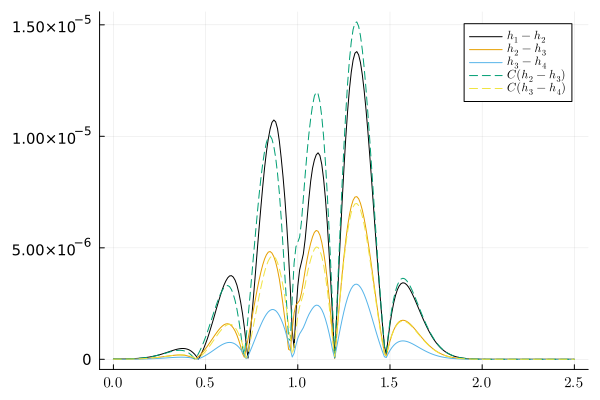

In [3]:
# Convergence Factor
factor12v23(order) = (1 - (1/1.2)^order) / ((1/1.2)^order - (1/1.44)^order)
factor23v34(order) = ((1/1.2)^order - (1/1.44)^order) / ((1/1.44)^order - (1/1.728)^order)
#factor12v23(4)-factor23v34(4)


plts = []
let l=0, t=1.0, dirss,
    dirss = [
        [
            ("gaussian_250_r0000/gaussian_250/", "250"),
            ("gaussian_300_r0000/gaussian_300/", "300"),
            ("gaussian_360_r0000/gaussian_360/", "360"),
            ("gaussian_432_r0000/gaussian_432/", "432"),
        ],
    ]

    for (j, dirs) in enumerate(dirss)
        (dats, _) = MiscTSV.load_data_1d(dirs, t; parent_dir="../../data/ScalarWave/2levels",
                                                  prefix="testsubcyclingmc2-state",
                                                  level=l, ngh=0)

        # Interpolate
        itps = []
        for dat in dats
            x = dat[1]
            y = dat[2]
            itp = Spline1D(x, y, k = 5)
            push!(itps, itp)
        end

        #x0 = -1.0:0.05:1.0
        x0 = 0.0:0.01:2.5
        f_h1_h2 = itps[1].(x0) - itps[2].(x0)
        f_h2_h3 = itps[2].(x0) - itps[3].(x0)
        f_h3_h4 = itps[3].(x0) - itps[4].(x0)
        
        plt = plot(titlefontsize=10, guidefontsize=10, tickfontsize=10, legendfontsize=8)
        xs = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5]
        xticks!(plt, xs, [L"%$(n)" for n in xs])
#
        plt = plot!(x0, abs.(f_h1_h2), label=L"h_1-h_2")
        plt = plot!(x0, abs.(f_h2_h3), label=L"h_2-h_3")
        plt = plot!(x0, abs.(f_h3_h4), label=L"h_3-h_4")
        plt = plot!(x0, abs.(f_h2_h3) * factor12v23(4), label=L"C(h_2-h_3)", linestyle=:dash)
        plt = plot!(x0, abs.(f_h3_h4) * factor23v34(4), label=L"C(h_3-h_4)", linestyle=:dash)
#
        display(plt)
    end
end